In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,r2_score

In [1113]:
## using pandas read_csv funtion to load csv files
train=pd.read_csv("E:/DATA_SET/train_Big_Mart.csv")
test_data=pd.read_csv("E:/DATA_SET/test_Big_Mart.csv")

## Displying the dataframe of both training and testing
print("Training Data")
display(train.head(3))
print("Testing Data")
display(test_data.head(3))

Training Data


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


Testing Data


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.60,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store


In [1114]:
train.shape

(8523, 12)

In [1115]:
test_data.shape

(5681, 11)

In [1116]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [1117]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [1118]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [1119]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

item_weight and outlet_size contain missing value

In [1120]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [1121]:
test_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


### Exploratort Data Analysis

In [1122]:
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

LF, low fat belong to same category that is Low Fat and reg
belong to Regular category so replacing LF, low fat and reg to
 thier category by

In [1123]:
test_data.Item_Fat_Content.value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [1124]:
train.Item_Fat_Content=train.Item_Fat_Content.replace('LF','Low Fat')
train.Item_Fat_Content=train.Item_Fat_Content.replace('reg','Regular')
train.Item_Fat_Content=train.Item_Fat_Content.replace('low fat','Low Fat')

In [1125]:
train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [1126]:
test_data.Item_Fat_Content=test_data.Item_Fat_Content.replace('LF','Low Fat')
test_data.Item_Fat_Content=test_data.Item_Fat_Content.replace('reg','Regular')
test_data.Item_Fat_Content=test_data.Item_Fat_Content.replace('low fat','Low Fat')

In [1127]:
train.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [1128]:
train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [1129]:
train.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [1130]:
train.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [1131]:
corr_matrix=train.corr()
corr_matrix['Item_Outlet_Sales']

Item_Weight                  0.014123
Item_Visibility             -0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:>

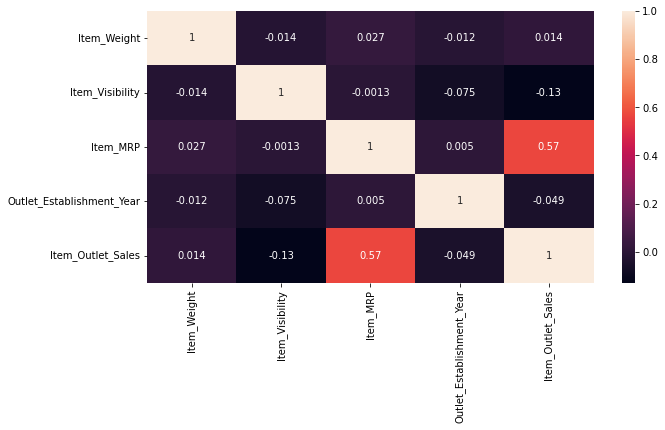

In [1132]:
plt.figure(figsize=(10,5))
sns.heatmap(train.corr(), annot=True)

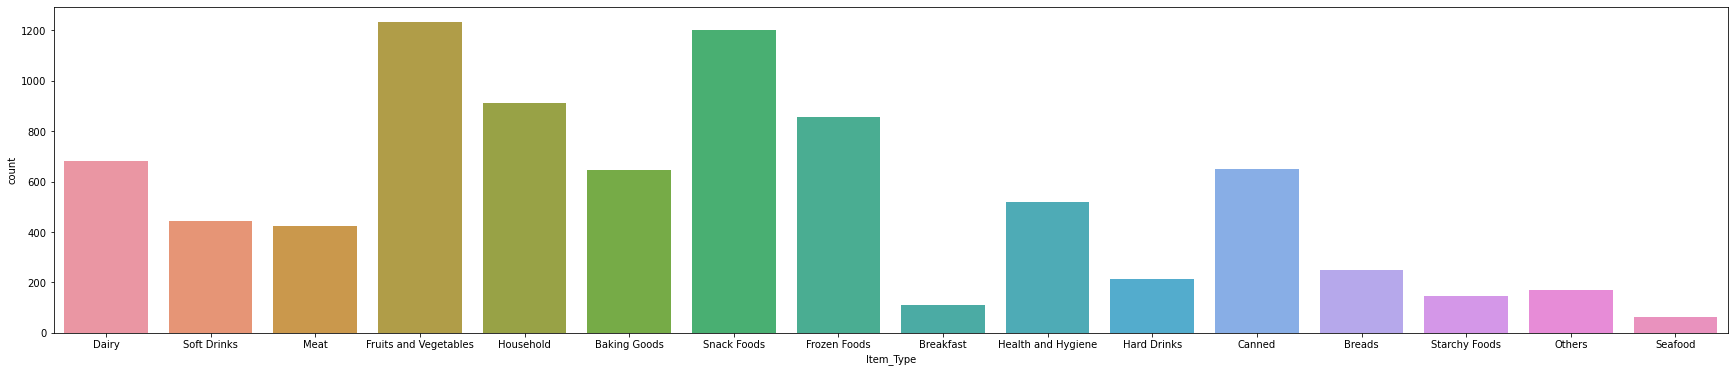

In [1133]:
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type',data=train)
plt.show()

<AxesSubplot:title={'center':'Item_Type Bar Chart'}, xlabel='count', ylabel='Item_Type'>

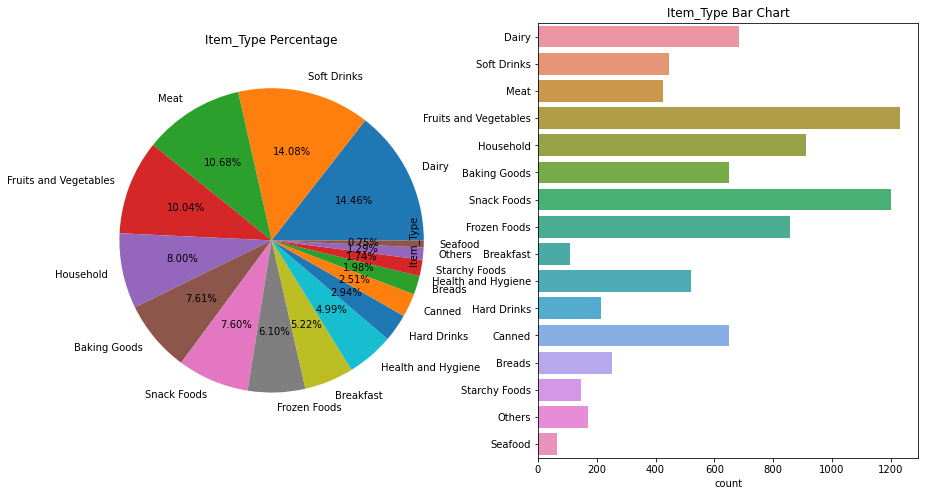

In [1134]:
labels=train['Item_Type'].dropna().unique()
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.title('Item_Type Percentage')
plt.pie(train['Item_Type'].value_counts(), 
        labels=labels,  
        autopct='%.2f%%')

plt.subplot(1,2,2)
plt.title('Item_Type Bar Chart')
sns.countplot(y="Item_Type", data=train)

here we can see that Fruits and Vegatables,Meat,soft drink,dairy,
selling percentage above 10 %.as well as we can see that Houshold ,banking goods,
snack foods,Frozen Foods,Breakfast selling percentage is above 5%.this all item_type
selling percentage is 78.57%.

<AxesSubplot:title={'center':'Item_Fat_Content Bar Chart'}, xlabel='Item_Fat_Content', ylabel='count'>

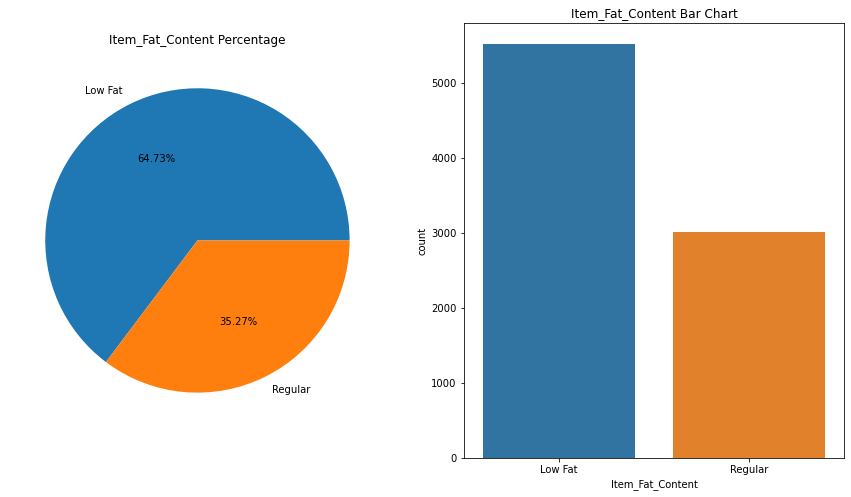

In [1135]:
labels=train['Item_Fat_Content'].dropna().unique()
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.title('Item_Fat_Content Percentage')
plt.pie(train['Item_Fat_Content'].value_counts(), 
        labels=labels,  
        autopct='%.2f%%')

plt.subplot(1,2,2)
plt.title('Item_Fat_Content Bar Chart')
sns.countplot(x="Item_Fat_Content", data=train)

Low Fat and Regular are not equal in category.here Low Fat have a higher Range
mean Low Fat product sell high so it is important.

<AxesSubplot:title={'center':'Outlet_Type Bar Chart'}, xlabel='Outlet_Type', ylabel='count'>

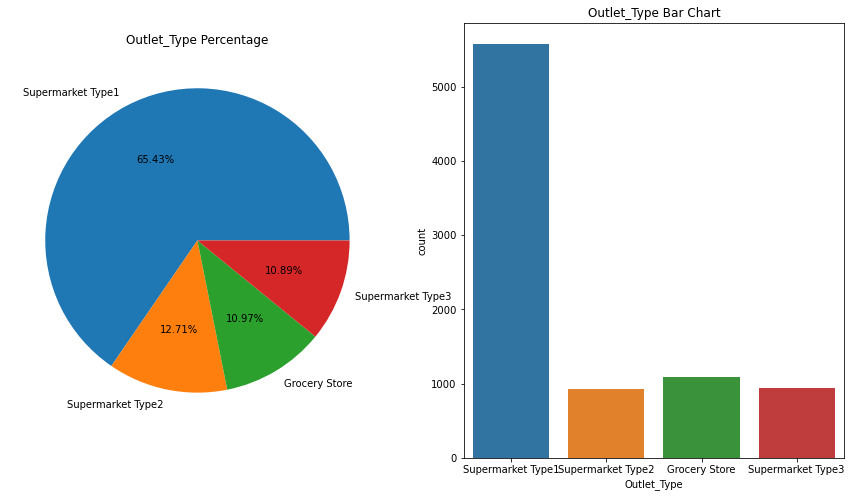

In [1136]:
labels=train['Outlet_Type'].dropna().unique()
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.title('Outlet_Type Percentage')
plt.pie(train['Outlet_Type'].value_counts(), 
        labels=labels,  
        autopct='%.2f%%')

plt.subplot(1,2,2)
plt.title('Outlet_Type Bar Chart')
sns.countplot(x="Outlet_Type", data=train)

here we can see that Higher product sold from Supermarket Type3.

C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

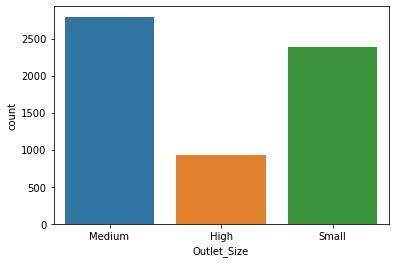

In [1137]:
sns.countplot(train['Outlet_Size'])

Maximum products sold from medium and small outlet_size but small product sold from High 
outlet_size.

C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

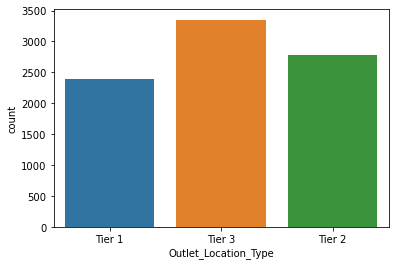

In [1138]:
sns.countplot(train['Outlet_Location_Type'])

C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

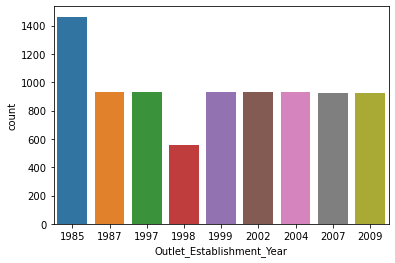

In [1139]:
sns.countplot(train['Outlet_Establishment_Year'])

C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


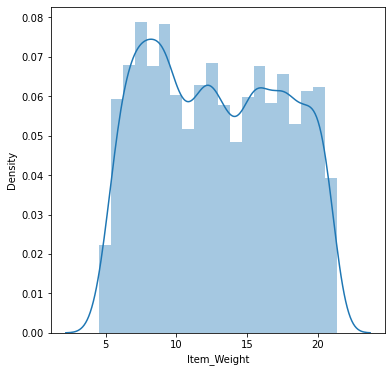

In [1140]:
plt.figure(figsize=(6,6))
sns.distplot(train['Item_Weight'])
plt.show()

C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

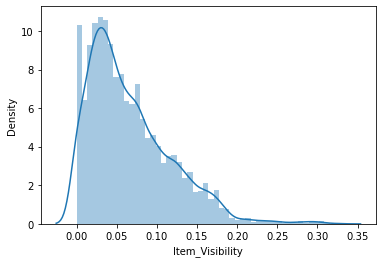

In [1141]:
sns.distplot(train['Item_Visibility'])

C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

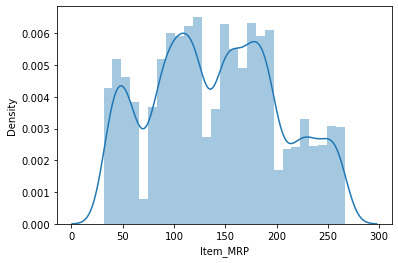

In [1142]:
sns.distplot(train['Item_MRP'])

C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

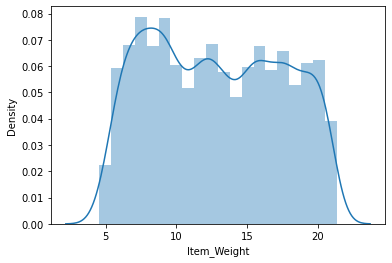

In [1143]:
sns.distplot(train['Item_Weight'])

C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

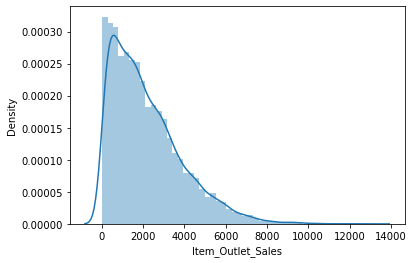

In [1144]:
sns.distplot(train['Item_Outlet_Sales'])

Now check the outliers

C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Weight'>

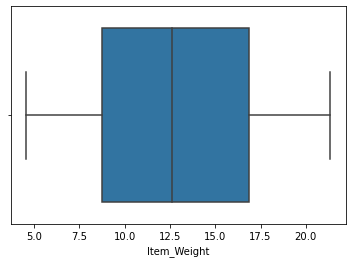

In [1145]:
sns.boxplot(train['Item_Weight'])

C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Visibility'>

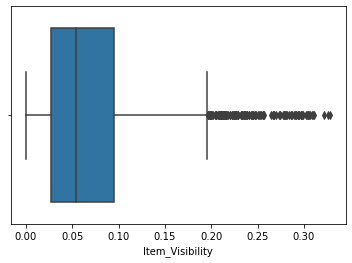

In [1146]:
sns.boxplot(train['Item_Visibility'])

C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_MRP'>

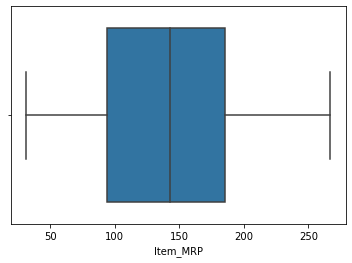

In [1147]:
sns.boxplot(train['Item_MRP'])

C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

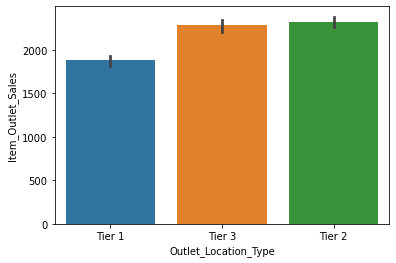

In [1148]:
sns.barplot(train['Outlet_Location_Type'],train['Item_Outlet_Sales'])

C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

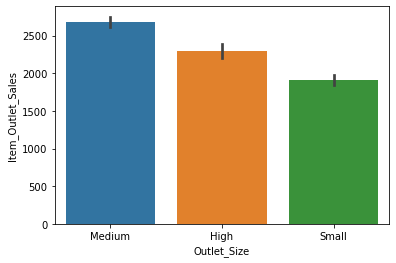

In [1149]:
sns.barplot(train['Outlet_Size'],train['Item_Outlet_Sales'])

C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

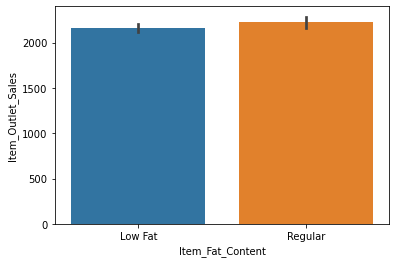

In [1150]:
sns.barplot(train['Item_Fat_Content'],train['Item_Outlet_Sales'])

### Filling the missing value

In [1151]:
train['Item_Weight']=train['Item_Weight'].fillna(train['Item_Weight'].mean())

In [1152]:
test_data['Item_Weight']=test_data['Item_Weight'].fillna(test_data['Item_Weight'].mean())

In [1153]:
train['Outlet_Size'].mode()

0    Medium
dtype: object

In [1154]:
train['Outlet_Size'].fillna('Medium',inplace=True)

In [1155]:
test_data['Outlet_Size'].mode()

0    Medium
dtype: object

In [1156]:
test_data['Outlet_Size'].fillna('Medium',inplace=True)

In [1157]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [1158]:
test_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

### Outliers handle

In [1159]:
## IQR based filtering outlier because our data distribution is skewed.
percentile25=train['Item_Visibility'].quantile(0.25)
percentile75=train['Item_Visibility'].quantile(0.75)

In [1160]:
percentile25

0.0269894775

In [1161]:
percentile75

0.0945852925

In [1162]:
iqr=percentile75-percentile25
iqr

0.067595815

In [1163]:
upper_limit=percentile75 + 1.5 * iqr
lower_limit=percentile25 - 1.5 * iqr

In [1164]:
print("Upper_Limit",upper_limit)
print("Lower_Limit",lower_limit)

Upper_Limit 0.195979015
Lower_Limit -0.07440424500000001


In [1165]:
new_df1_cap=train.copy()

new_df1_cap['Item_Visibility']=np.where(
    new_df1_cap['Item_Visibility']>upper_limit,
    upper_limit,
    np.where(
        new_df1_cap['Item_Visibility']<lower_limit,
        lower_limit,
        new_df1_cap['Item_Visibility']
    )
)

C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<AxesSubplot:xlabel='Item_Visibility'>

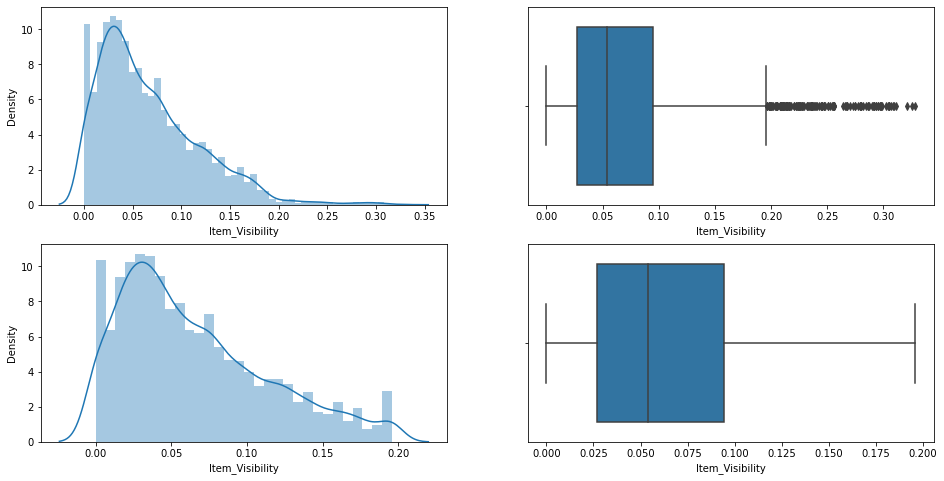

In [1166]:
## Comparision
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(train['Item_Visibility'])

plt.subplot(2,2,2)
sns.boxplot(train['Item_Visibility'])

plt.subplot(2,2,3)
sns.distplot(new_df1_cap['Item_Visibility'])

plt.subplot(2,2,4)
sns.boxplot(new_df1_cap['Item_Visibility'])

In [1167]:
percentile25=test_data['Item_Visibility'].quantile(0.25)
percentile75=test_data['Item_Visibility'].quantile(0.75)

In [1168]:
percentile25

0.027046875

In [1169]:
percentile75

0.093462623

In [1170]:
iqr=percentile75-percentile25
iqr

0.066415748

In [1171]:
upper_limit=percentile75 + 1.5 * iqr
lower_limit=percentile25 - 1.5 * iqr

In [1172]:
new_df1_cap=test_data.copy()

new_df1_cap['Item_Visibility']=np.where(
    new_df1_cap['Item_Visibility']>upper_limit,
    upper_limit,
    np.where(
        new_df1_cap['Item_Visibility']<lower_limit,
        lower_limit,
        new_df1_cap['Item_Visibility']
    )
)

C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SR COM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<AxesSubplot:xlabel='Item_Visibility'>

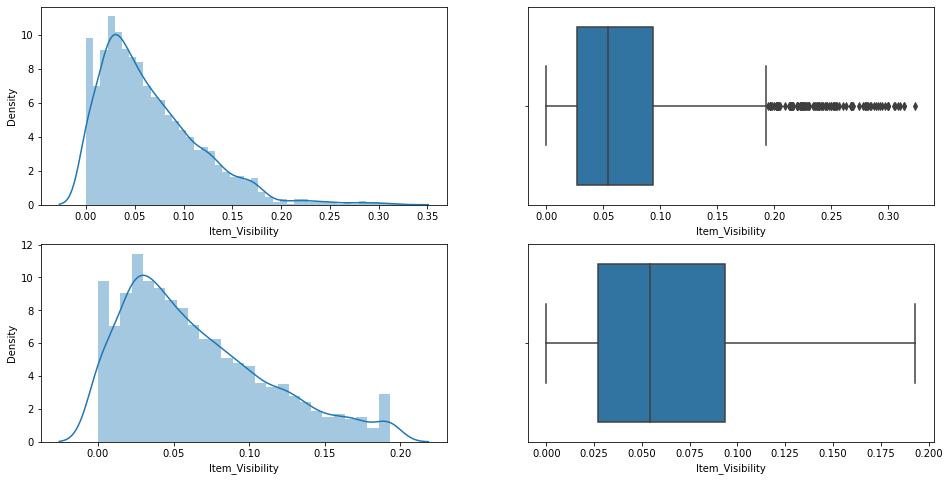

In [1173]:
## Comparision
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(test_data['Item_Visibility'])

plt.subplot(2,2,2)
sns.boxplot(test_data['Item_Visibility'])

plt.subplot(2,2,3)
sns.distplot(new_df1_cap['Item_Visibility'])

plt.subplot(2,2,4)
sns.boxplot(new_df1_cap['Item_Visibility'])


In [1174]:
train['Outlet_Location_Type'].replace('Tier 3',1,inplace=True)
train['Outlet_Location_Type'].replace('Tier 2',2,inplace=True)
train['Outlet_Location_Type'].replace('Tier 1',3,inplace=True)

In [1175]:
train['Item_Fat_Content'].replace('Low Fat',1,inplace=True)
train['Item_Fat_Content'].replace('Regular',2,inplace=True)

In [1176]:
train['Outlet_Size'].replace('High',1,inplace=True)
train['Outlet_Size'].replace('Medium',2,inplace=True)
train['Outlet_Size'].replace('Small',3,inplace=True)

In [1177]:
train['Outlet_Type'].replace('Grocery Store',1,inplace=True)
train['Outlet_Type'].replace('Supermarket Type3',2,inplace=True)
train['Outlet_Type'].replace('Supermarket Type2',3,inplace=True)
train['Outlet_Type'].replace('Supermarket Type1',3,inplace=True)

### One Hot Encoding

In [1179]:
feat = ["Item_Type"]
X = pd.get_dummies(train[feat],drop_first=True)
train = pd.concat([train,X],axis=1)

In [1180]:
train.drop(labels = ['Item_Identifier','Item_Type','Outlet_Identifier'],inplace = True,axis =1)

In [1181]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Breads,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.30,1,0.016047,249.8092,1999,2,3,3,3735.1380,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,2,0.019278,48.2692,2009,2,1,3,443.4228,0,...,0,0,0,0,0,0,0,0,1,0
2,17.50,1,0.016760,141.6180,1999,2,3,3,2097.2700,0,...,0,0,0,0,1,0,0,0,0,0
3,19.20,2,0.000000,182.0950,1998,2,1,1,732.3800,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,1,0.000000,53.8614,1987,1,1,3,994.7052,0,...,0,0,0,1,0,0,0,0,0,0


In [1182]:
test_data['Outlet_Location_Type'].replace('Tier 3',1,inplace=True)
test_data['Outlet_Location_Type'].replace('Tier 2',2,inplace=True)
test_data['Outlet_Location_Type'].replace('Tier 1',3,inplace=True)

In [1183]:
test_data['Item_Fat_Content'].replace('Low Fat',1,inplace=True)
test_data['Item_Fat_Content'].replace('Regular',2,inplace=True)

In [1184]:
test_data['Outlet_Size'].replace('High',1,inplace=True)
test_data['Outlet_Size'].replace('Medium',2,inplace=True)
test_data['Outlet_Size'].replace('Small',3,inplace=True)

In [1185]:
test_data['Outlet_Type'].replace('Grocery Store',1,inplace=True)
test_data['Outlet_Type'].replace('Supermarket Type3',2,inplace=True)
test_data['Outlet_Type'].replace('Supermarket Type2',3,inplace=True)
test_data['Outlet_Type'].replace('Supermarket Type1',3,inplace=True)

In [1186]:
feat = ["Item_Type"]
d1 = pd.get_dummies(test_data[feat],drop_first=True)
test_data = pd.concat([test_data,d1],axis=1)

In [1187]:
test_data.drop(labels = ['Item_Identifier','Item_Type','Outlet_Identifier'],inplace = True,axis =1)

In [1188]:
test_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Breads,Item_Type_Breakfast,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,20.750000,1,0.007565,107.8622,1999,2,3,3,0,0,...,0,0,0,0,0,0,0,1,0,0
1,8.300000,2,0.038428,87.3198,2007,2,2,3,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14.600000,1,0.099575,241.7538,1998,2,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,7.315000,1,0.015388,155.0340,2007,2,2,3,0,0,...,0,0,0,0,0,0,0,1,0,0
4,12.695633,2,0.118599,234.2300,1985,2,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1189]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
train['Item_MRP']=scaler.fit_transform(train[['Item_MRP']])

In [1190]:
test_data['Item_MRP']=scaler.fit_transform(test_data[['Item_MRP']])

In [1191]:
x=train.drop(['Item_Outlet_Sales'],axis=1)
x.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Breads,Item_Type_Breakfast,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.30,1,0.016047,1.747454,1999,2,3,3,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,2,0.019278,-1.489023,2009,2,1,3,0,0,...,0,0,0,0,0,0,0,0,1,0
2,17.50,1,0.016760,0.010040,1999,2,3,3,0,0,...,0,0,0,0,1,0,0,0,0,0
3,19.20,2,0.000000,0.660050,1998,2,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,1,0.000000,-1.399220,1987,1,1,3,0,0,...,0,0,0,1,0,0,0,0,0,0


In [1192]:
y=train[['Item_Outlet_Sales']]
y.head()

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052


In [1193]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

#### Random forest

In [1194]:
# RandomForest regressor model
rf_model = RandomForestRegressor(n_estimators = 2000, n_jobs=-1, random_state = 0)

In [1195]:
rf_model.fit(x_train, y_train)

C:\Users\SRCOM~1\AppData\Local\Temp/ipykernel_760/1995960165.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


RandomForestRegressor(n_estimators=2000, n_jobs=-1, random_state=0)

In [1196]:
y_pred = rf_model.predict(x_test)

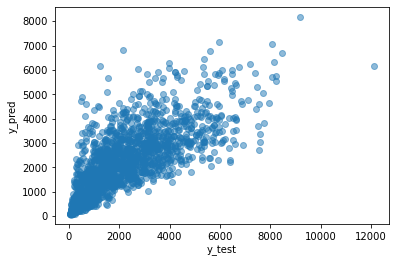

In [1197]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [1198]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 score:', r2_score(y_test, y_pred))

MAE: 810.448308319765
MSE: 1291799.2864690819
RMSE: 1136.5734848522034
R2 score: 0.5586397955617893
